# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [73]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

# 設定 data_path
dir_data = 'C:\\Users\\USER\\Desktop\\tensor\\data\\'

### 之前做過的處理

In [74]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [75]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

離散化受雇天數

In [81]:
data=app_train[['TARGET','DAYS_EMPLOYED']]
Years_EMPLOYED= pd.DataFrame(data['DAYS_EMPLOYED']/-365)
Bin=[0,10,20,30,40,50]
data['YEARS_EMPLOYED']=data['DAYS_EMPLOYED']/-365
data['years_bin']=pd.cut(data['YEARS_EMPLOYED'],Bin)
data['years_bin'].value_counts()
#data.head(5)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(0, 10]     201181
(10, 20]     38398
(20, 30]      9551
(30, 40]      2771
(40, 50]       234
Name: years_bin, dtype: int64

檢驗受雇天數與還款率關係

Correlation between TARGET and DAYS_EMPLOYED 0.07495845742543902


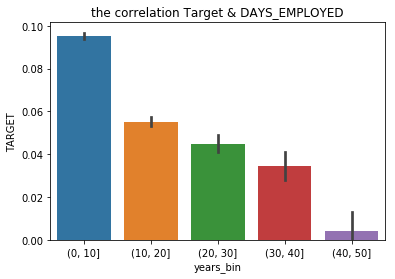

In [78]:
sns.barplot(data['years_bin'],app_train['TARGET'])
plt.title('the correlation Target & DAYS_EMPLOYED')
print("Correlation between TARGET and DAYS_EMPLOYED",app_train['DAYS_EMPLOYED'].corr(app_train['TARGET']))

看分組結果

In [79]:
EMPLOYED_groups  = data.groupby('years_bin').mean()
EMPLOYED_groups

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED
years_bin,,,
"(0, 10]",0.095392,-1433.760450,3.928111
"(10, 20]",0.055133,-4986.763581,13.662366
"(20, 30]",0.044917,-8740.054130,23.945354
"(30, 40]",0.034645,-12309.952364,33.725897
"(40, 50]",0.004274,-15483.149573,42.419588


Text(0.5,1,'Failure to Repay by YEARS_EMPLOYE Group')

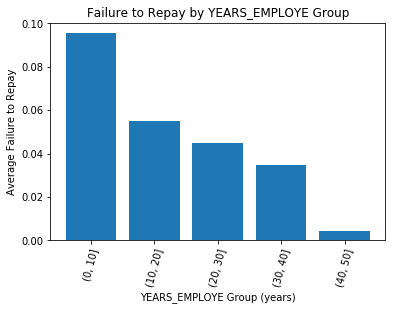

In [80]:
plt.bar(range(len(EMPLOYED_groups.index)), EMPLOYED_groups['TARGET'])
plt.xticks(range(len(EMPLOYED_groups.index)), EMPLOYED_groups.index, rotation = 75); plt.xlabel('YEARS_EMPLOYE Group (years)'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by YEARS_EMPLOYE Group')
#可發現受雇年資越低者越容易發生違約，而40-50年資的用戶則應為貸款筆數較少因此違約率低
